In [11]:
# q2.ipynb - Cell 1: Install Dependencies
print("Installing/upgrading dependencies...")
# Add the --upgrade flag to ensure we have the latest version
!pip install -q --upgrade ultralytics

print("\nInstallation complete.")

Installing/upgrading dependencies...

Installation complete.


In [12]:
# q2.ipynb - Cell 2: Imports and Model Loading
from ultralytics import YOLO, SAM
from PIL import Image
import matplotlib.pyplot as plt

# 1. Load the text-promptable detector (YOLO-World) with the correct name
print("Loading YOLO-World detector...")
detector = YOLO('yolov8l-world.pt')  # <-- Corrected model name

# 2. Load the segmentation model (SAM)
print("Loading SAM segmenter...")
segmenter = SAM('sam_b.pt')

print("\nModels loaded successfully.")

Loading YOLO-World detector...
Loading SAM segmenter...

Models loaded successfully.


In [15]:
# q2.ipynb - Cell 3: Main Processing Pipeline
def segment_image_with_text(image_path: str, text_prompt: str):
    """
    Performs text-prompted segmentation using a two-step pipeline:
    1. YOLO-World detects the object based on the text prompt.
    2. SAM segments the object based on the detected bounding box.
    """
    try:
        # --- Step 1: Detect object with YOLO-World based on text prompt ---
        print(f"\nDetecting '{text_prompt}'...")
        # Set the text prompt as the class the model should look for
        detector.set_classes([text_prompt])

        # Run the detector
        # Lower the threshold to be more sensitive to smaller objects
        detector_results = detector.predict(image_path, conf=0.05, verbose=False)

        # Check if any objects were detected
        if len(detector_results) == 0 or len(detector_results[0].boxes) == 0:
            print(f"Could not find any objects matching '{text_prompt}'.")
            return

        # Extract the bounding boxes of the detected objects
        bboxes = detector_results[0].boxes.xyxy

        # --- Step 2: Segment the object with SAM using the detected bounding boxes ---
        print(f"Segmenting the detected region...")
        # Run the segmenter on the same image, providing the bounding boxes as prompts
        segmenter_results = segmenter.predict(image_path, bboxes=bboxes, verbose=False)

        # Check if any masks were generated
        if not segmenter_results or not segmenter_results[0].masks:
            print("Segmentation failed.")
            return

        # --- Step 3: Display the final result ---
        print("Displaying final segmentation...")
        # Use the plot() function from the final segmentation results
        annotated_image = segmenter_results[0].plot()

        # Convert from BGR (OpenCV format) to RGB for Matplotlib
        annotated_image_rgb = annotated_image[..., ::-1]

        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_image_rgb)
        plt.title(f"Segmentation for: '{text_prompt}'")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


Detecting 'a dog'...
Segmenting the detected region...
Displaying final segmentation...


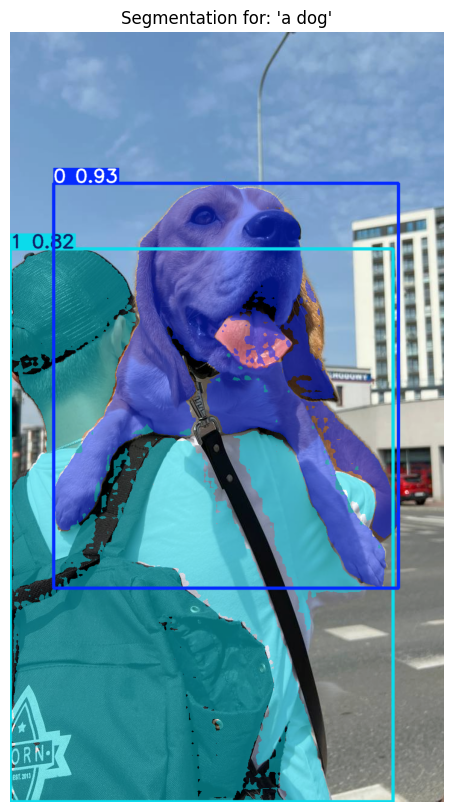


Detecting 'dog collar'...
Could not find any objects matching 'dog collar'.


In [16]:
# q2.ipynb - Cell 4: Execute the Pipeline

# --- Download a sample image ---
IMAGE_URL = "https://media.roboflow.com/notebooks/examples/dog.jpeg"
IMAGE_PATH = "dog.jpeg"
!wget -q -O {IMAGE_PATH} {IMAGE_URL}

# --- Define your text prompt ---
TEXT_PROMPT = "a dog"

# --- Run the full pipeline ---
segment_image_with_text(
    image_path=IMAGE_PATH,
    text_prompt=TEXT_PROMPT
)

# --- Example with a more specific prompt ---
TEXT_PROMPT_2 = "dog collar"
segment_image_with_text(
    image_path=IMAGE_PATH,
    text_prompt=TEXT_PROMPT_2
)